In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Grid size and parameters
nx, ny = 100, 100              #grid spacing (km)
dx = dy = 1.0                  #time step (hrs)
dt = 0.1                       #diffusion coefficient (km^2/hr)
D = 0.1                        #current velocity (km/hr)
u, v = 0.2, 0.1

# Initialize oil concentration grid
C = np.zeros((nx, ny))

#Initial oil spill at centre
C[nx//2, ny//2] = 100.0    #units: arbitrary



In [10]:
#Simulation Loop
steps = 200
for t in range(steps):
    Cn = C.copy()
    
    #Difference term (central difference)
    diffusion = D*(
        (np.roll(Cn, -1, axis=0) - 2*Cn + np.roll(Cn, 1, axis=0)) / dx**2 + 
        (np.roll(Cn, -1, axis=1) -2*Cn + np.roll(Cn, 1, axis=1)) / dy**2 )
    
    #Advection term (upwind scheme)
    adv_x = -u * (Cn - np.roll(Cn, 1 , axis=0)) / dx
    adv_y = -v * (Cn -np.roll(Cn, 1, axis=1)) /dy
    
    #Update concentration
    C+=dt * (diffusion +adv_x + adv_y)


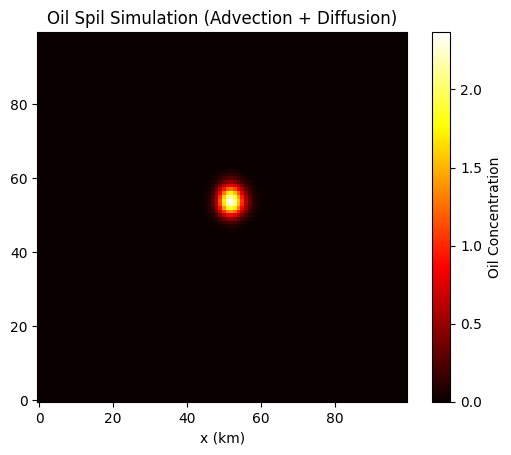

In [11]:
#Visulaize
plt.imshow(C, cmap='hot', origin='lower')
plt.colorbar(label="Oil Concentration")
plt.title("Oil Spil Simulation (Advection + Diffusion)")
plt.xlabel("x (km)")
plt.show()